<a href="https://colab.research.google.com/github/monicasjsu/Machine_Learning/blob/main/clustering_Monica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

data_url = 'https://raw.githubusercontent.com/monicasjsu/ML_Clustering_Assignment/master/HR_Employee_Attrition.csv'
df = pd.read_csv(data_url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check if there are any null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check the description of the dataset.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check value_counts and remove any columns with singular values
single_cols = []
for col in df.columns:
    if len(df[col].unique())==1:
        print(col)
        single_cols.append(col)

EmployeeCount
Over18
StandardHours


In [ ]:
# Now lets drop the columns
df.drop(single_cols, axis=1, inplace=True)
# Now lets check the cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

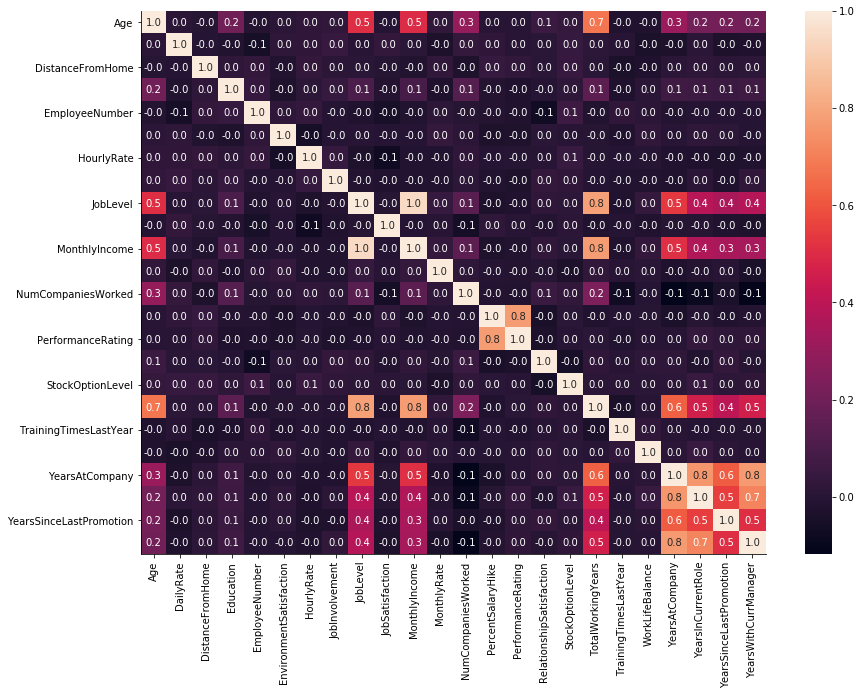

In [ ]:
# correlation plot to know which attributes show highest correlation
corr = df.corr()
g = sns.heatmap(corr, annot=True, fmt='.1f')
sns.despine()
g.figure.set_size_inches(14, 10)
plt.show()

In [ ]:
# Change the Object type to categorical types, so that they can be converted to Integer
# using cat.codes
for col in ['BusinessTravel', 'Gender', 'JobRole', 'OverTime', 'EducationField', 'Department', 'MaritalStatus']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [ ]:
# Check the dataset types and column count again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int8
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int8
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 n

In [ ]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

In [ ]:
# As K has to provided in K-Means clustering, lets jsut start with K = 5  
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 0 ... 0 2 0]


array([[3.45588972e+01, 1.61152882e+00, 8.08721805e+02, 1.23057644e+00,
        9.01002506e+00, 2.93734336e+00, 2.34085213e+00, 1.03878947e+03,
        2.68671679e+00, 6.41604010e-01, 6.65238095e+01, 2.77192982e+00,
        1.53884712e+00, 4.56892231e+00, 2.76441103e+00, 1.10275689e+00,
        4.16687218e+03, 6.19274937e+03, 2.57393484e+00, 2.70676692e-01,
        1.52932331e+01, 3.17293233e+00, 2.68922306e+00, 8.49624060e-01,
        8.26315789e+00, 2.77944862e+00, 2.76441103e+00, 5.62406015e+00,
        3.68671679e+00, 1.59147870e+00, 3.73934837e+00],
       [3.51850900e+01, 1.62210797e+00, 7.95210797e+02, 1.29305913e+00,
        9.64524422e+00, 2.85347044e+00, 2.18508997e+00, 1.03563753e+03,
        2.75578406e+00, 5.91259640e-01, 6.65012853e+01, 2.74550129e+00,
        1.69922879e+00, 4.64267352e+00, 2.75835476e+00, 1.13110540e+00,
        4.72830591e+03, 2.26428329e+04, 2.51413882e+00, 2.93059126e-01,
        1.52544987e+01, 3.14910026e+00, 2.68637532e+00, 7.63496144e-01,
       

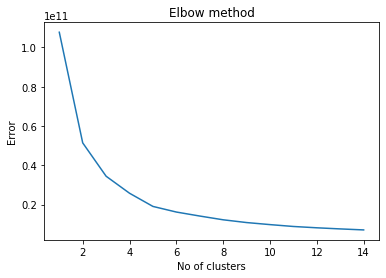

In [ ]:
# Lets try to find the elbow of SSE scores and choose the optimal value for K
error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 15), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# From the elbow curve, choosing K=3 provides the best clustering results
import collections
import numpy as np

kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X)
df['cluster'] = y_kmeans3
df['cluster_distance'] = pd.DataFrame(kmeans3.transform(X)).min(axis=1)

print (df.head())
collections.Counter(y_kmeans3)

   Age Attrition  ...  cluster  cluster_distance
0   41       Yes  ...        1       1927.590099
1   49        No  ...        1       4212.831346
2   37       Yes  ...        0       6404.485284
3   33        No  ...        1       3440.953290
4   27        No  ...        1       4671.913353

[5 rows x 34 columns]


Counter({0: 645, 1: 622, 2: 203})

In [ ]:
# Now lets calculate the percentage of employee attrition for each cluster.
def attrition_percentage(x):
    print("Cluster {}".format(x['cluster'].iloc[0]))
    value_counts = x['Attrition'].value_counts()
    print (value_counts)
    attr_per = 100 * (value_counts[1]/float(value_counts[0] + value_counts[1]))
    print("Attrition percentage {}".format(attr_per))
    
df.groupby(by=['cluster']).apply(attrition_percentage)


Cluster 0
No     533
Yes    112
Name: Attrition, dtype: int64
Attrition percentage 17.364341085271317
Cluster 1
No     512
Yes    110
Name: Attrition, dtype: int64
Attrition percentage 17.684887459807076
Cluster 2
No     188
Yes     15
Name: Attrition, dtype: int64
Attrition percentage 7.389162561576355


""


In [ ]:
# Now lets detect outliers from cluster distance for each record that we stored above
# Considering outliers as the ones for which distance from its centroid exceed 2  * Mean 
def is_outlier(x):
    mean = x['cluster_distance'].mean()
    outliers = []
    for index, row in x.iterrows():
        if row['cluster_distance'] > 2 * mean:
            outliers.append(True)
        else:
            outliers.append(False)
    df_outliers = pd.DataFrame(outliers)
    print("Cluster {}".format(x['cluster'].iloc[0]))
    print (df_outliers[0].value_counts())

df.groupby(by=['cluster']).apply(is_outlier)

Cluster 0
False    639
True       6
Name: 0, dtype: int64
Cluster 1
False    607
True      15
Name: 0, dtype: int64
Cluster 2
False    200
True       3
Name: 0, dtype: int64


""


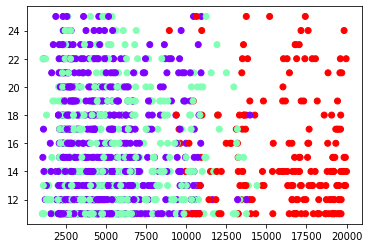

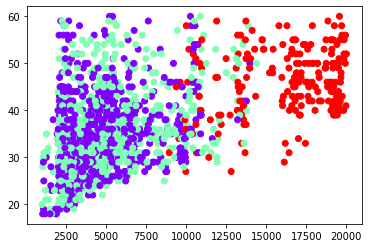

In [ ]:
# utility method to annotate labels on (x,y) points on the 2d plane.
def annotate_and_show_plot(x, y):
    for x1, y1 in zip(x, y):
        plt.annotate("", xy=(x1, y1), xytext=(-3, 3), textcoords='offset points', ha='right')
    plt.show()

# Lets try to plot 2 features from the dataset with cluster labels, 
# just for visualization purposes. I am choosing 
x1 = df['MonthlyIncome']
x2 = df['PercentSalaryHike']

plt.figure()
plt.scatter(x1, x2, c=kmeans3.labels_, cmap='rainbow')
annotate_and_show_plot(x1, x2)

x3 = df['MonthlyIncome']
x4 = df['Age']

plt.figure()
plt.scatter(x3, x4, c=kmeans3.labels_, cmap='rainbow')
annotate_and_show_plot(x1, x2)

# By plotting the relation between current monthly income and percent salary hike,
# it is clear from the plot that employees with salary greater than 15000 are in a
# single cluster (green)

# By plotting the relation between current monthly income and Age,
# we can deduce that that employees with salary greater than 15000 are 
# also older that other employees.

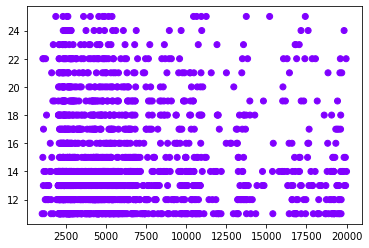

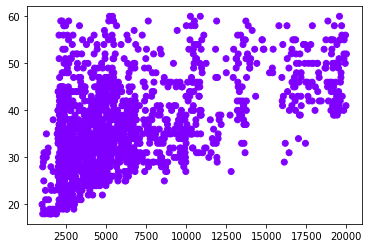

In [ ]:
# Lets use DBSCAN for clustering this time and compare the performances.
# We must standardize the data
X_scaled = StandardScaler().fit_transform(X)
# Setting up DBSCAN
dbscan = DBSCAN(min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
dbscan.labels_
collections.Counter(clusters)
# print(clusters)

# Lets try to plot 2 features from the dataset with cluster labels, 
# just to show that we got only one cluster. 
d1 = df['MonthlyIncome']
d2 = df['PercentSalaryHike']

plt.figure()
plt.scatter(x1, x2, c=dbscan.labels_, cmap='rainbow')
annotate_and_show_plot(d1, d2)

d3 = df['MonthlyIncome']
d4 = df['Age']

plt.figure()
plt.scatter(d3, d4, c=dbscan.labels_, cmap='rainbow')
annotate_and_show_plot(x1, x2)
